Faria Naznin-1931198042

7(b)-closed loop

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dt = time step
dt = 0.01
ti= 0; tf= 15;
t = np.arange(ti, tf, dt)
t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.497e+01, 1.498e+01,
       1.499e+01])

In [3]:
T= 15
Tsq = np.power(T,2)
Tcb = np.power(T,3)
#initialized A
A = np.array([[1, 0, 0, 0,  0, 0, 0, 0],
              [0, 1, 0, 0,  0, 0, 0, 0],
              [0, 0, 0, 0,  1, 0, 0, 0],
              [0, 0, 0, 0,  0, 1, 0, 0],
              [1, T, Tsq, Tcb,  0, 0, 0, 0],
              [0, 1, 2*T, 3*Tsq,  0, 0, 0, 0],
              [0, 0, 0, 0,  1, T, Tsq, Tcb,],
              [0, 0, 0, 0,  0, 1, 2*T, 3*Tsq]
              ]
            )
A

array([[   1,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0],
       [   1,   15,  225, 3375,    0,    0,    0,    0],
       [   0,    1,   30,  675,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,   15,  225, 3375],
       [   0,    0,    0,    0,    0,    1,   30,  675]])

In [4]:
# A pesudo inverse
Ainv = np.linalg.pinv(A)
#initialized b
b = np.array([0, 0, 0, -0.5, 5, 0, 5, -0.5])
#matrix multiplication x = Ainv * b
x= np.matmul(Ainv, b)
Ainv

array([[ 1.00000000e+00,  6.57760495e-13, -5.52538061e-18,
         0.00000000e+00, -6.19490567e-16,  3.81438435e-15,
         0.00000000e+00,  0.00000000e+00],
       [ 1.93424569e-16,  1.00000000e+00, -5.52332145e-17,
         0.00000000e+00, -1.94900710e-16, -2.52873958e-17,
         0.00000000e+00,  0.00000000e+00],
       [-1.33333333e-02, -1.33333333e-01,  7.47210043e-18,
         0.00000000e+00,  1.33333333e-02, -6.66666667e-02,
         0.00000000e+00,  0.00000000e+00],
       [ 5.92592593e-04,  4.44444444e-03, -2.50992886e-19,
         0.00000000e+00, -5.92592593e-04,  4.44444444e-03,
         0.00000000e+00,  0.00000000e+00],
       [-2.04165123e-17,  3.53844622e-17,  1.00000000e+00,
         4.14882717e-13,  2.04165123e-17, -1.02234920e-16,
         5.02970729e-16, -3.22867442e-16],
       [ 2.19473768e-18,  5.05716168e-17, -6.94486066e-17,
         1.00000000e+00, -2.19473768e-18,  1.09897097e-17,
        -5.40679670e-17,  1.25776347e-15],
       [-2.15314420e-20, -7.320828

In [5]:
# Extracting coefficients
a11, a12, a13, a14, a21, a22, a23, a24 = x
x

array([-3.09745283e-15, -9.74503549e-16,  6.66666667e-02, -2.96296296e-03,
       -2.04662988e-13, -5.00000000e-01,  1.66666667e-01, -7.40740741e-03])

In [6]:
# Calculating X and Y with polynomial equations
xDesired = a11 + a12 * t + a13 * t**2 + a14 * t**3
yDesired = a21 + a22 * t + a23 * t**2 + a24 * t**3

In [7]:
# Calculating x_double_dot and y_double_dot from the trajectory
xdd = np.gradient(np.gradient(xDesired, t), t)
ydd = np.gradient(np.gradient(yDesired, t), t)

# new states
x_new = xDesired[0]
y_new = yDesired[0]
theta = np.arctan2(np.gradient(xDesired, t)[0], np.gradient(xDesired, t)[0])
V = np.sqrt(np.gradient(xDesired, t)[0]**2 + np.gradient(yDesired, t)[0]**2)

# store robot states
x_states = [x_new]
y_states = [y_new]

noise_std_v = 0.01
noise_std_theta = 0.001

### Kp = 4 , Kd = 4 noise_std_v = 0.01 noise_std_theta = 0.001

In [8]:
kp = 4
kd = 4

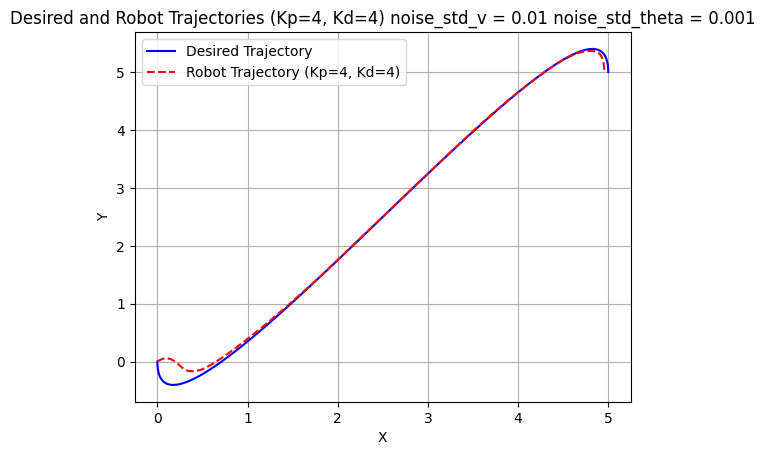

In [9]:
# the unicycle equations using Euler's method
for i in range(1, len(t)):
    # Calculating error terms
    x_err = x_new - xDesired[i]
    y_err = y_new - yDesired[i]
    x_derr = V * np.cos(theta) - np.gradient(xDesired, t)[i]
    y_derr = V * np.sin(theta) - np.gradient(yDesired, t)[i]

    # Calculating control inputs using the closed-loop controller with matrix inverse
    A_inv = np.linalg.inv(np.array([
        [np.cos(theta), -V * np.sin(theta)],
        [np.sin(theta), V * np.cos(theta)]
    ]))
    b = np.array([
        xdd[i] - (1 * x_err) - (2 * x_derr),
        ydd[i] - (1 * y_err) - (2 * y_derr)

    ])
    control_inputs = np.matmul(A_inv, b)

    # Extracting control inputs
    a = control_inputs[0]
    omega = control_inputs[1]

    # Adding noise to V and theta
    V += a * (t[i] - t[i-1]) + np.random.normal(0, noise_std_v)
    theta += omega * (t[i] - t[i-1]) + np.random.normal(0, noise_std_theta)

    # Update robot states
    x_new += V * np.cos(theta) * (t[i] - t[i-1])
    y_new += V * np.sin(theta) * (t[i] - t[i-1])

    x_states.append(x_new)
    y_states.append(y_new)

# Plot the desired trajectory and robot trajectory for Kp = 4 and Kd = 4
plt.figure()
plt.plot(xDesired, yDesired, label='Desired Trajectory', color='blue')
plt.plot(x_states, y_states, label='Robot Trajectory (Kp=4, Kd=4)', linestyle='--', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories (Kp=4, Kd=4) noise_std_v = 0.01 noise_std_theta = 0.001')
plt.grid(True)
plt.show()

In [10]:
T= 15
Tsq = np.power(T,2)
Tcb = np.power(T,3)
#initialized A
A = np.array([[1, 0, 0, 0,  0, 0, 0, 0],
              [0, 1, 0, 0,  0, 0, 0, 0],
              [0, 0, 0, 0,  1, 0, 0, 0],
              [0, 0, 0, 0,  0, 1, 0, 0],
              [1, T, Tsq, Tcb,  0, 0, 0, 0],
              [0, 1, 2*T, 3*Tsq,  0, 0, 0, 0],
              [0, 0, 0, 0,  1, T, Tsq, Tcb,],
              [0, 0, 0, 0,  0, 1, 2*T, 3*Tsq]
              ]
            )
# A pesudo inverse
Ainv = np.linalg.pinv(A)
#initialized b
b = np.array([0, 0, 0, -0.5, 5, 0, 5, -0.5])
#matrix multiplication x = Ainv * b
x= np.matmul(Ainv, b)
Ainv
a11, a12, a13, a14, a21, a22, a23, a24 = x
# Calculating X and Y with polynomial equations
xDesired = a11 + a12 * t + a13 * t**2 + a14 * t**3
yDesired = a21 + a22 * t + a23 * t**2 + a24 * t**3
# Calculating x_double_dot and y_double_dot from the trajectory
xdd = np.gradient(np.gradient(xDesired, t), t)
ydd = np.gradient(np.gradient(yDesired, t), t)

# new states
x_new = xDesired[0]
y_new = yDesired[0]
theta = np.arctan2(np.gradient(xDesired, t)[0], np.gradient(xDesired, t)[0])
V = np.sqrt(np.gradient(xDesired, t)[0]**2 + np.gradient(yDesired, t)[0]**2)

# store robot states
x_states = [x_new]
y_states = [y_new]


In [11]:
noise_std_v = 0.01
noise_std_theta = 0.1

In [12]:
kp = 4
kd = 4

## Kp = 4 , Kd = 4  noise_std_v = 0.01 noise_std_theta = 0.1

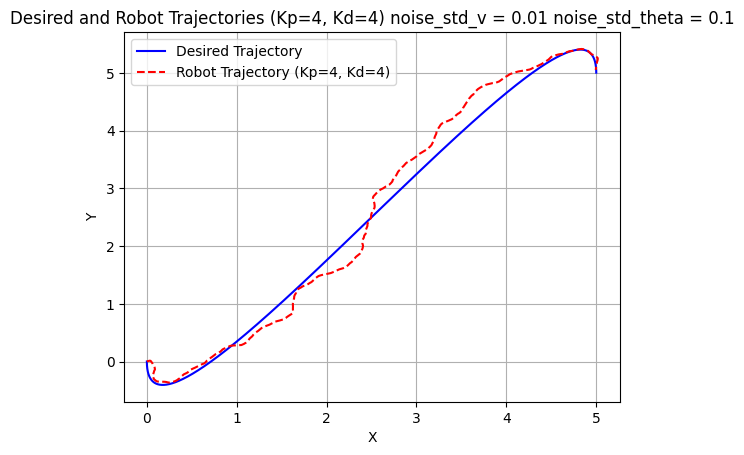

In [13]:
# the unicycle equations using Euler's method
for i in range(1, len(t)):
    # Calculating error terms
    x_err = x_new - xDesired[i]
    y_err = y_new - yDesired[i]
    x_derr = V * np.cos(theta) - np.gradient(xDesired, t)[i]
    y_derr = V * np.sin(theta) - np.gradient(yDesired, t)[i]

    # Calculating control inputs using the closed-loop controller with matrix inverse
    A_inv = np.linalg.inv(np.array([
        [np.cos(theta), -V * np.sin(theta)],
        [np.sin(theta), V * np.cos(theta)]
    ]))
    b = np.array([
        xdd[i] - (4 * x_err) - (4 * x_derr),
        ydd[i] - (4 * y_err) - (4 * y_derr)

    ])
    control_inputs = np.matmul(A_inv, b)

    # Extracting control inputs
    a = control_inputs[0]
    omega = control_inputs[1]

    # Adding noise to V and theta
    V += a * (t[i] - t[i-1]) + np.random.normal(0, noise_std_v)
    theta += omega * (t[i] - t[i-1]) + np.random.normal(0, noise_std_theta)

    # Update robot states
    x_new += V * np.cos(theta) * (t[i] - t[i-1])
    y_new += V * np.sin(theta) * (t[i] - t[i-1])

    x_states.append(x_new)
    y_states.append(y_new)

# Plot the desired trajectory and robot trajectory for Kp = 4 and Kd = 4
plt.figure()
plt.plot(xDesired, yDesired, label='Desired Trajectory', color='blue')
plt.plot(x_states, y_states, label='Robot Trajectory (Kp=4, Kd=4)', linestyle='--', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories (Kp=4, Kd=4) noise_std_v = 0.01 noise_std_theta = 0.1')
plt.grid(True)
plt.show()

In [14]:
T= 15
Tsq = np.power(T,2)
Tcb = np.power(T,3)
#initialized A
A = np.array([[1, 0, 0, 0,  0, 0, 0, 0],
              [0, 1, 0, 0,  0, 0, 0, 0],
              [0, 0, 0, 0,  1, 0, 0, 0],
              [0, 0, 0, 0,  0, 1, 0, 0],
              [1, T, Tsq, Tcb,  0, 0, 0, 0],
              [0, 1, 2*T, 3*Tsq,  0, 0, 0, 0],
              [0, 0, 0, 0,  1, T, Tsq, Tcb,],
              [0, 0, 0, 0,  0, 1, 2*T, 3*Tsq]
              ]
            )
# A pesudo inverse
Ainv = np.linalg.pinv(A)
#initialized b
b = np.array([0, 0, 0, -0.5, 5, 0, 5, -0.5])
#matrix multiplication x = Ainv * b
x= np.matmul(Ainv, b)
Ainv
a11, a12, a13, a14, a21, a22, a23, a24 = x
# Calculating X and Y with polynomial equations
xDesired = a11 + a12 * t + a13 * t**2 + a14 * t**3
yDesired = a21 + a22 * t + a23 * t**2 + a24 * t**3
# Calculating x_double_dot and y_double_dot from the trajectory
xdd = np.gradient(np.gradient(xDesired, t), t)
ydd = np.gradient(np.gradient(yDesired, t), t)

# new states
x_new = xDesired[0]
y_new = yDesired[0]
theta = np.arctan2(np.gradient(xDesired, t)[0], np.gradient(xDesired, t)[0])
V = np.sqrt(np.gradient(xDesired, t)[0]**2 + np.gradient(yDesired, t)[0]**2)

# store robot states
x_states = [x_new]
y_states = [y_new]

## Kp = 4 , Kd = 4 noise_std_v = 0.01 noise_std_theta = 0.01

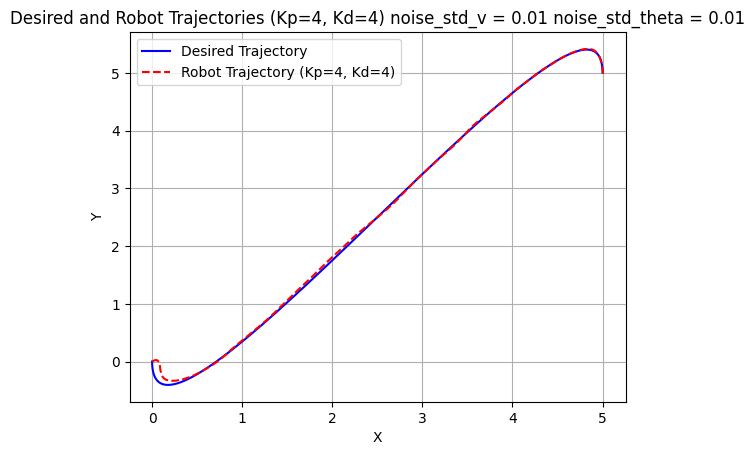

In [15]:
noise_std_v = 0.01
noise_std_theta = 0.01
# the unicycle equations using Euler's method
for i in range(1, len(t)):
    # Calculating error terms
    x_err = x_new - xDesired[i]
    y_err = y_new - yDesired[i]
    x_derr = V * np.cos(theta) - np.gradient(xDesired, t)[i]
    y_derr = V * np.sin(theta) - np.gradient(yDesired, t)[i]

    # Calculating control inputs using the closed-loop controller with matrix inverse
    A_inv = np.linalg.inv(np.array([
        [np.cos(theta), -V * np.sin(theta)],
        [np.sin(theta), V * np.cos(theta)]
    ]))
    b = np.array([
        xdd[i] - (4 * x_err) - (4 * x_derr),
        ydd[i] - (4 * y_err) - (4 * y_derr)

    ])
    control_inputs = np.matmul(A_inv, b)

    # Extracting control inputs
    a = control_inputs[0]
    omega = control_inputs[1]

    # Adding noise to V and theta
    V += a * (t[i] - t[i-1]) + np.random.normal(0, noise_std_v)
    theta += omega * (t[i] - t[i-1]) + np.random.normal(0, noise_std_theta)

    # Update robot states
    x_new += V * np.cos(theta) * (t[i] - t[i-1])
    y_new += V * np.sin(theta) * (t[i] - t[i-1])

    x_states.append(x_new)
    y_states.append(y_new)

# Plot the desired trajectory and robot trajectory for Kp = 4 and Kd = 4
plt.figure()
plt.plot(xDesired, yDesired, label='Desired Trajectory', color='blue')
plt.plot(x_states, y_states, label='Robot Trajectory (Kp=4, Kd=4)', linestyle='--', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories (Kp=4, Kd=4) noise_std_v = 0.01 noise_std_theta = 0.01')
plt.grid(True)
plt.show()